In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv("/content/drive/MyDrive/laptop_data.csv")

In [38]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Preprocessing Section

In [40]:
#drop  Unnamed: 0
df.drop(columns=["Unnamed: 0"],inplace=True)

#OneHotEncoding

> Girintili blok



In [41]:
df = df.join(pd.get_dummies(df.Company))
df.drop("Company",axis=1,inplace=True)

In [42]:
df = df.join(pd.get_dummies(df.TypeName))
df.drop("TypeName",axis=1,inplace=True)

In [43]:
df["ScreenResolution"].str.split(" ").apply(lambda x:x[-1])

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [44]:
df["ScreenResolution"] = df["ScreenResolution"].str.split(" ").apply(lambda x:x[-1])
df["ScreenWidth"] = df["ScreenResolution"].str.split("x").apply(lambda x:x[0])
df["ScreenHeight"] = df["ScreenResolution"].str.split("x").apply(lambda x:x[1])

In [45]:
df.drop("ScreenResolution",axis=1,inplace=True)

In [46]:
df["Cpu Brand"] = df["Cpu"].str.split(" ").apply(lambda x:x[0])
df["Cpu Frequence"] = df["Cpu"].str.split(" ").apply(lambda x:x[-1])
df.drop("Cpu",inplace=True,axis=1)

In [47]:
df["Cpu Frequence"] = df["Cpu Frequence"].str[:-3]

In [48]:
df

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,Asus,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,Cpu Brand,Cpu Frequence
0,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,1,0,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5
3,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,0,...,0,0,0,0,1,0,2880,1800,Intel,2.7
4,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,0,...,0,0,0,0,1,0,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,0,0,0,...,1,0,0,0,0,0,1920,1080,Intel,2.5
1299,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,0,0,0,...,1,0,0,0,0,0,3200,1800,Intel,2.5
1300,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,0,...,0,0,0,1,0,0,1366,768,Intel,1.6
1301,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,0,...,0,0,0,1,0,0,1366,768,Intel,2.5


In [49]:
df["Ram"] = df["Ram"].str.replace("GB","")
df["Weight"] = df["Weight"].str.replace("kg","")



In [50]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df["Cpu Frequence"]= df["Cpu Frequence"].astype("float")
df["ScreenHeight"]= df["ScreenHeight"].astype("int32")
df["ScreenWidth"]= df["ScreenWidth"].astype("int32")

In [51]:
df["Memory Amount"] = df["Memory"].str.split(" ").apply(lambda x:x[0])
df["Memory Type"] = df["Memory"].str.split(" ").apply(lambda x:x[1])

In [52]:
df["Memory Type"].value_counts()

SSD       843
HDD       375
Flash      75
Hybrid     10
Name: Memory Type, dtype: int64

In [53]:
def turn_gb_and_tb_into_value(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB"in value:
    return float(value[:value.find("TB")])*1000000

In [54]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_gb_and_tb_into_value)

df.drop("Memory",axis=1, inplace=True)

In [55]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)


In [56]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [57]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [58]:
# onehotencode it  df["Cpu Brand"] and df["Memory Type"]
cpu_categories = pd.get_dummies(df["Cpu Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
df = df.join(cpu_categories)
df.drop("Cpu Brand",axis=1,inplace=True)

In [59]:

"""from sklearn.preprocessing import OneHotEncoder

categorical_column = ["Gpu"]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_column])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_column))
df = pd.concat([df, encoded_df], axis=1)


df.drop(categorical_column, axis=1, inplace=True)"""






'from sklearn.preprocessing import OneHotEncoder\n\ncategorical_column = ["Gpu"]\nencoder = OneHotEncoder()\nencoded_data = encoder.fit_transform(df[categorical_column])\n\nencoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_column))\ndf = pd.concat([df, encoded_df], axis=1)\n\n\ndf.drop(categorical_column, axis=1, inplace=True)'

In [60]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Memory Type'], dtype='object')


In [61]:
df.head()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
0,13.3,8,1.37,71378.6832,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,13.3,8,1.34,47895.5232,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,15.6,8,1.86,30636.0000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,15.4,16,1.83,135195.3360,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,13.3,8,1.37,96095.8080,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [62]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU
Inches,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,0.019637,...,0.094654,-0.127740,0.110131,0.088614,-0.093285,-0.064775,-0.100867,0.129801,-0.122000,-0.052816
Ram,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,-0.016214,...,-0.093410,0.001822,-0.088980,0.149562,-0.021374,-0.017529,0.028914,-0.104759,0.107051,-0.023894
Weight,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,0.014053,...,0.062424,-0.100576,0.051578,0.082438,-0.087904,-0.048100,-0.096042,0.062641,-0.057386,-0.037026
Price,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,-0.027135,...,-0.162060,0.015656,-0.177094,0.137048,0.018312,0.152381,0.089928,-0.180111,0.181127,-0.018431
Acer,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,-0.014074,...,0.148299,-0.023027,-0.067673,-0.065093,-0.023027,-0.055411,-0.029411,0.068130,-0.066566,-0.008119
Apple,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,-0.006148,...,-0.028607,0.614108,-0.029563,-0.275713,-0.010059,-0.024206,0.784352,-0.028607,0.028849,-0.003547
Asus,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,-0.017845,...,0.027411,-0.029197,-0.042919,0.055472,0.030999,-0.070257,-0.037291,0.038455,-0.036835,-0.010295
Chuwi,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,-0.002308,...,-0.010737,-0.003776,-0.011096,0.022300,-0.003776,-0.009086,-0.004822,-0.010737,0.010828,-0.001331
Dell,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,-0.026102,...,0.187929,-0.042706,-0.125507,0.041451,-0.042706,-0.032633,-0.054545,-0.121448,0.122473,-0.015058
Fujitsu,0.019637,-0.016214,0.014053,-0.027135,-0.014074,-0.006148,-0.017845,-0.002308,-0.026102,1.000000,...,-0.010737,-0.003776,-0.011096,0.022300,-0.003776,-0.009086,-0.004822,-0.010737,0.010828,-0.001331


<ipython-input-63-278ba7e25fdb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu",annot=False)


<Axes: >

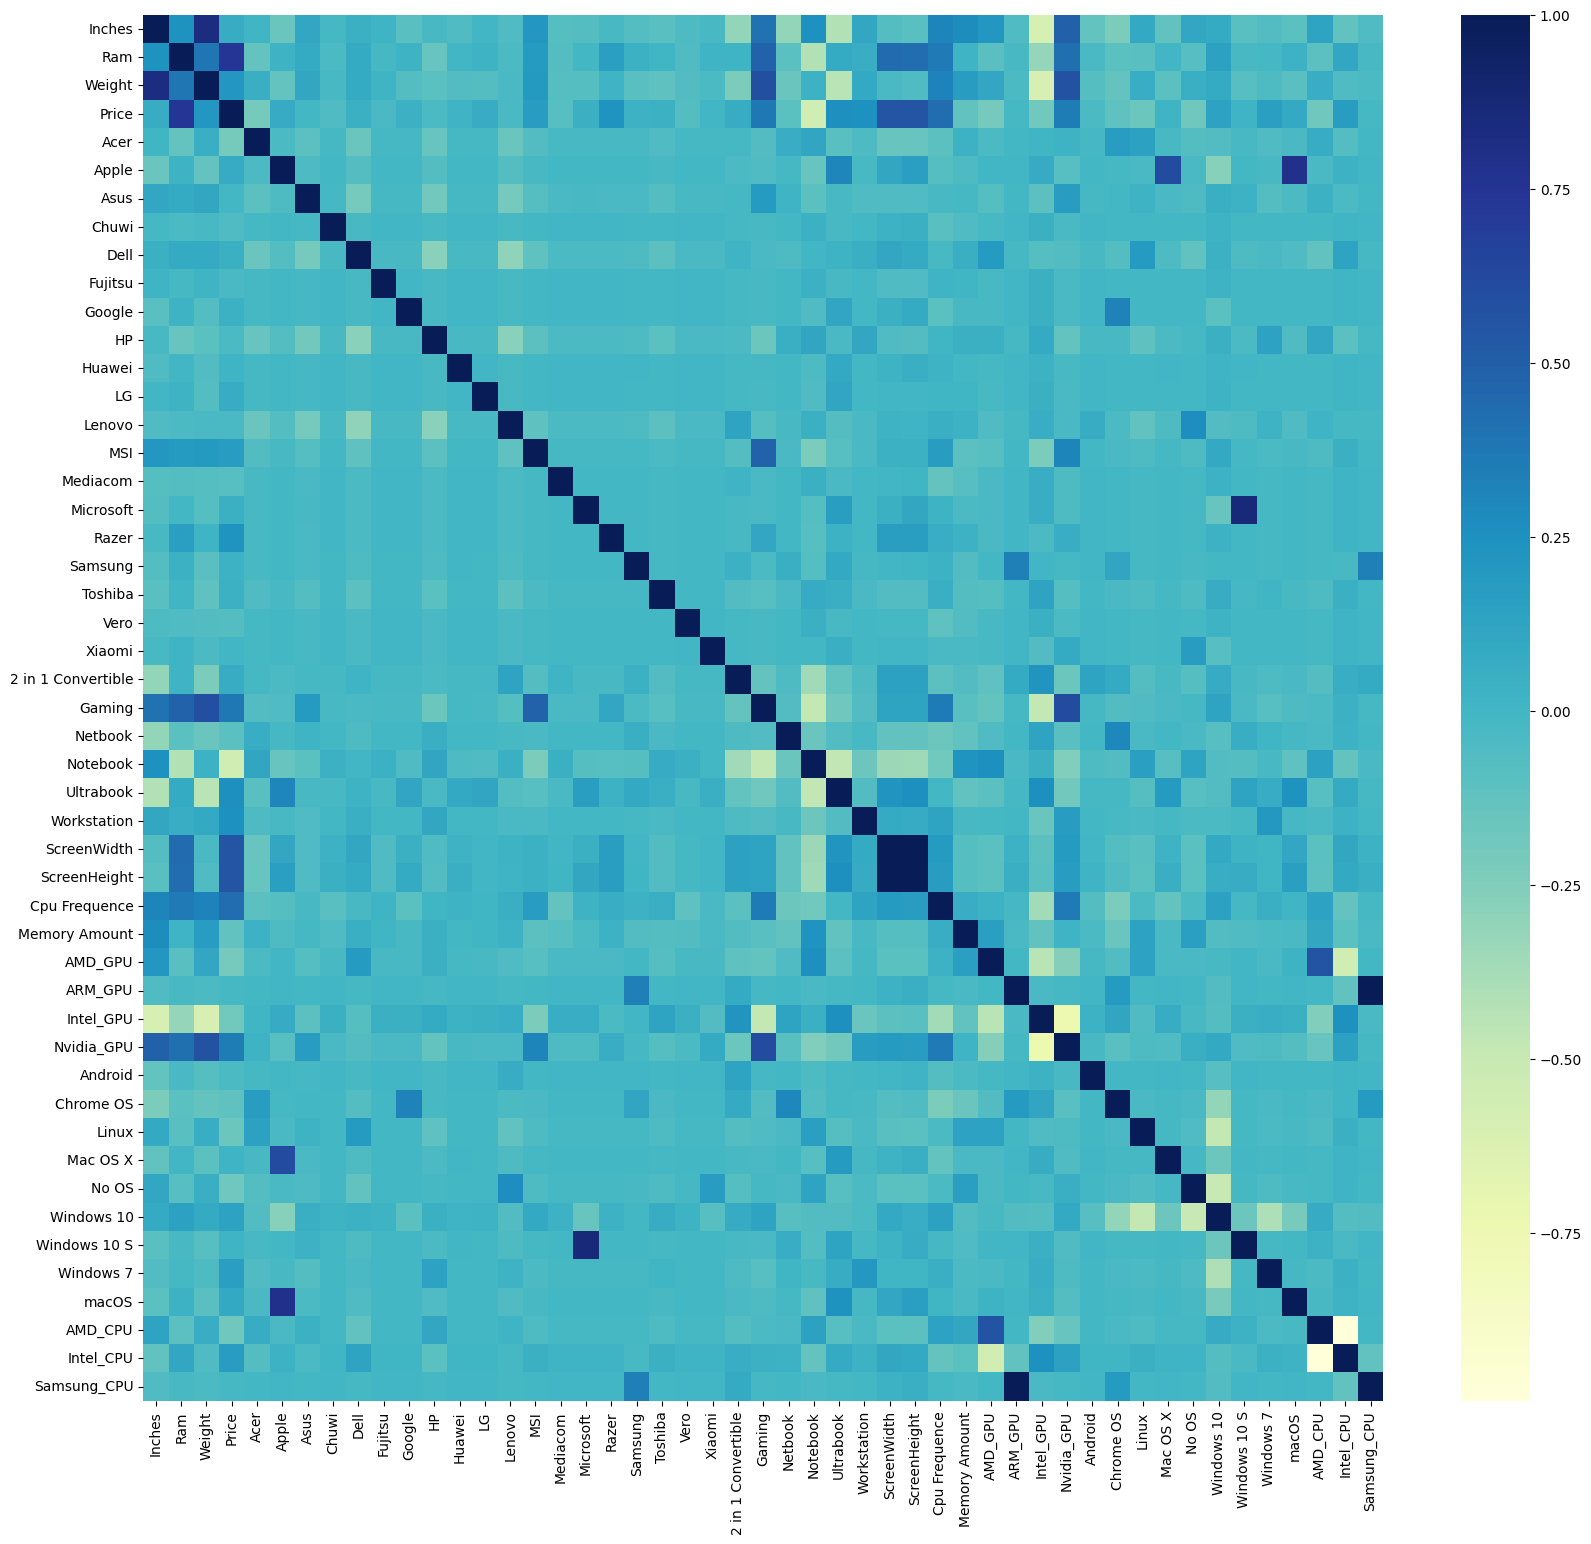

In [63]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=False)

In [64]:
target_correlations = df.corr(numeric_only=True)['Price'].apply(np.abs).sort_values()


In [31]:
target_correlations


Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI                   0.180100
AMD_CPU 

In [32]:
selected_features = target_correlations[-21:].index
selected_features = list(selected_features)
selected_features
len(selected_features)

21

In [33]:
limited_df = df[selected_features]
limited_df

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,Cpu Frequence,Notebook,ScreenHeight,ScreenWidth,Ram,Price
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,71378.6832
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,47895.5232
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,30636.0000
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,135195.3360
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,33992.6400
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,79866.7200
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,12201.1200
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,40705.9200


<Axes: >

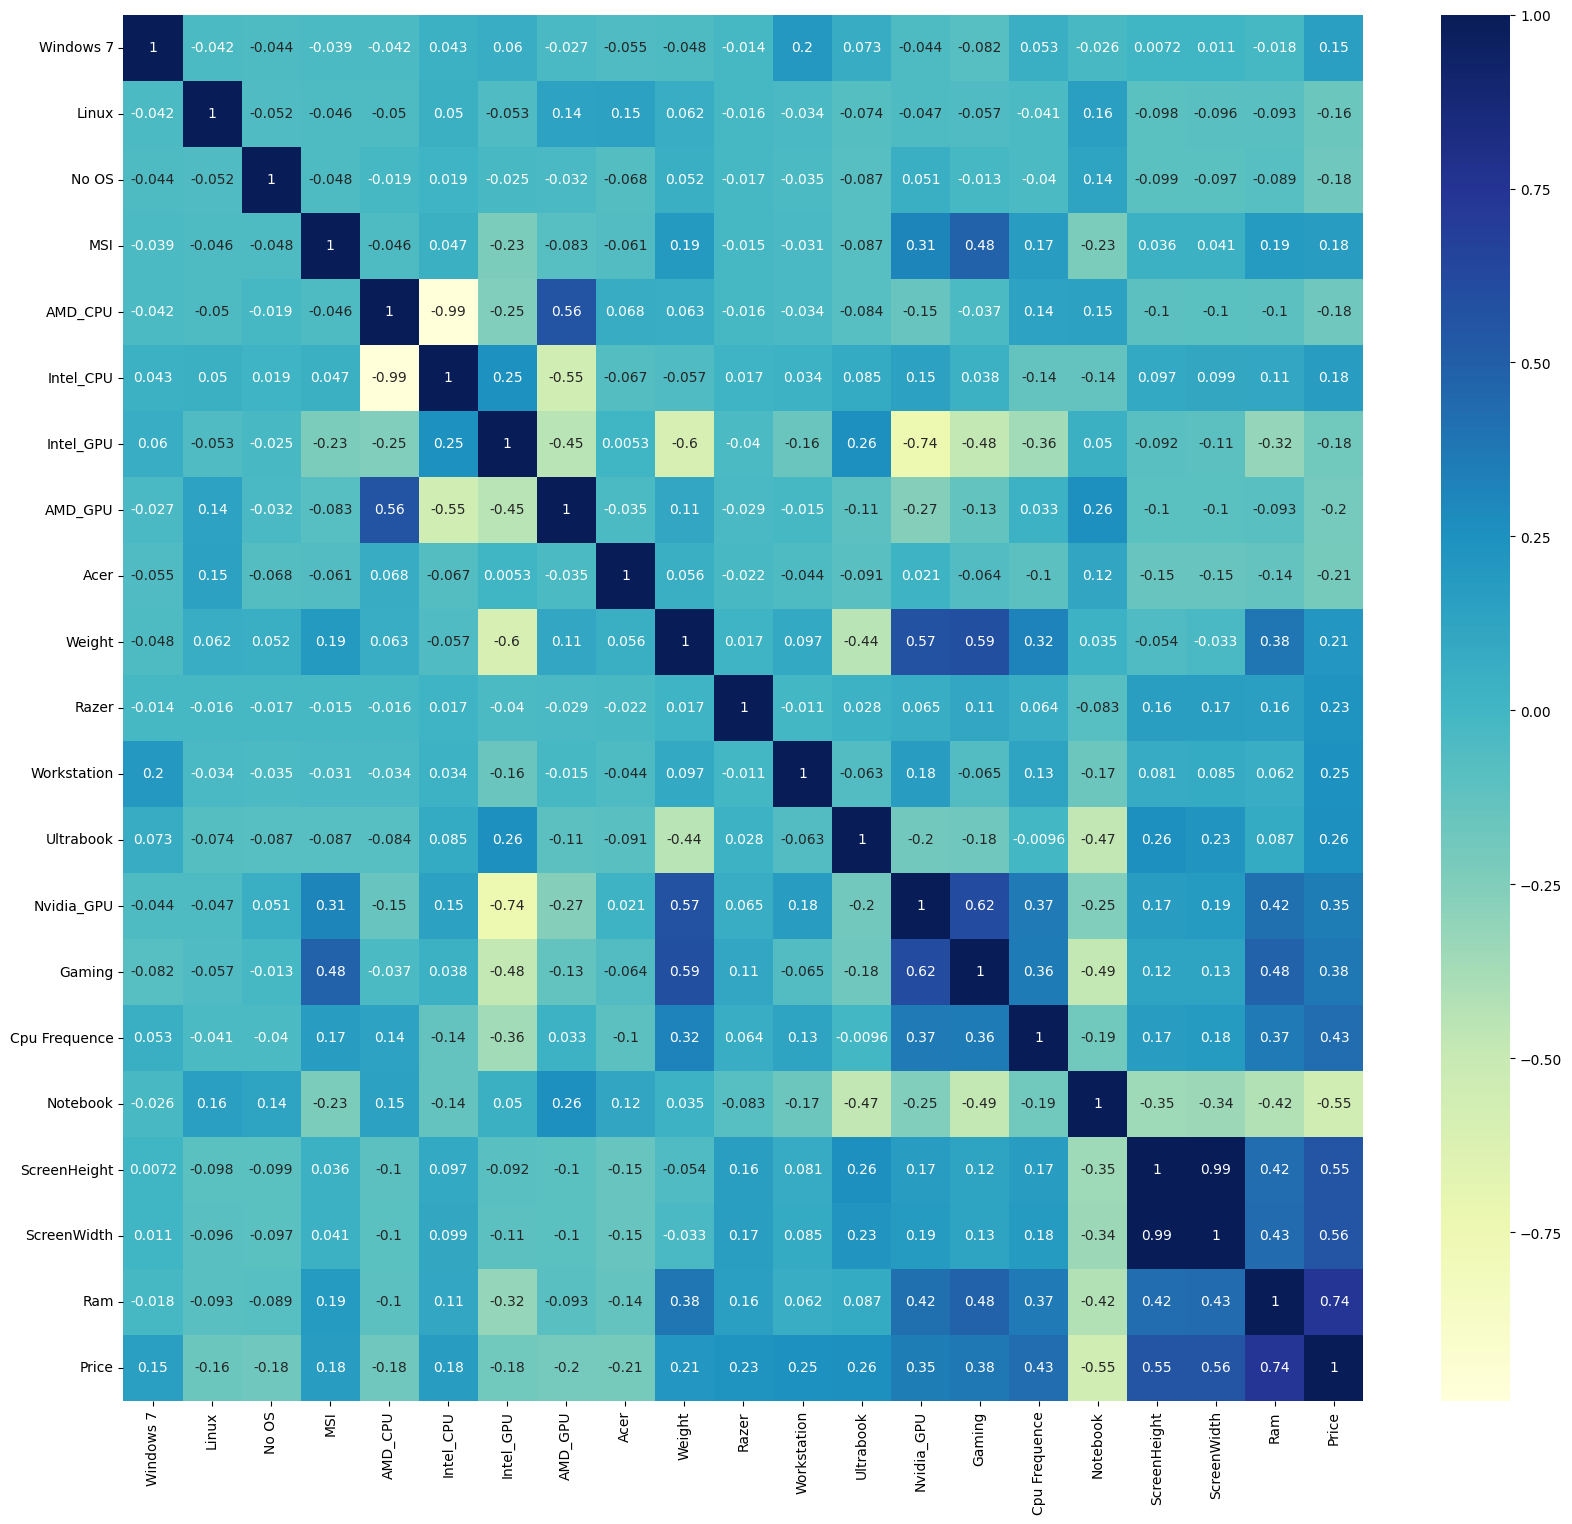

In [34]:
plt.figure(figsize=(20,18))
sns.heatmap(limited_df.corr(),cmap="YlGnBu",annot=True)

In [35]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Memory Type'], dtype='object')


#**Modelling**







In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X,y = limited_df.drop("Price",axis=1),limited_df["Price"]
#train test split it x and  y test size can be 0.15 or more if u want 0.2 ok
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_scaled,y_test)


0.808542067871634

In [ ]:
y_preds = forest.predict(X_test_scaled)

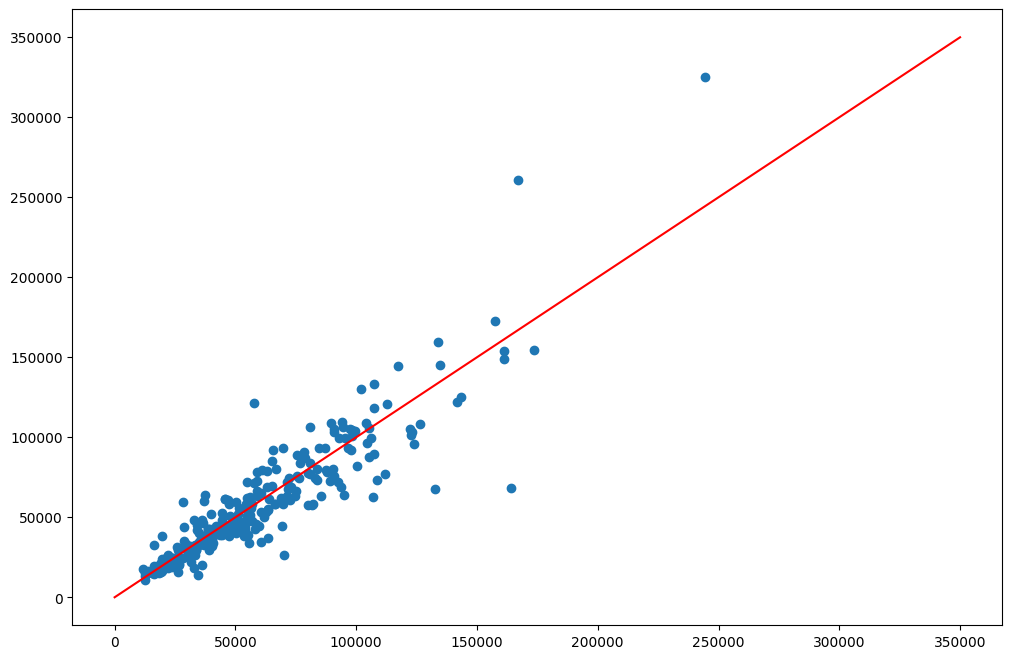

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_preds, y_test)
plt.plot(range(0, 350000), range(0, 350000), c="red")

In [ ]:
X_new_scaled = scaler.transform(X_test.iloc[0].values.reshape(1, -1))
forest.predict(X_new_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([75544.6464])

In [ ]:
y_test.iloc[0]

89084.16